First of all we need to install <b>Qiskit</b> into Google Colab

In [ ]:
!pip install qiskit


Before starting check whether qiskit is properly installed or not by running the command below;

In [4]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.6.1',
 'qiskit-aqua': '0.7.5',
 'qiskit-ibmq-provider': '0.10.0',
 'qiskit-ignis': '0.4.0',
 'qiskit-terra': '0.15.2'}

Now Qiskit follows a 3 step approach to solve problems;

- <b>Build</b>: design a quantum circuit that represents the problem you are considering.

- <b>Execute</b>: run experiments on different backends (which include both systems and simulators).

- <b>Analyze</b>: calculate summary statistics and visualize the results of experiments.

<b>Step 1</b>: Now lets start by importing the basic elements needed for our program 

In [5]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In more details the above imports are;

```QuantumCircuit```: can be thought as the instructions of the quantum system. It holds all your quantum operations.

```execute```: runs your circuit / experiment.

```Aer```: handles simulator backends.

```plot_histogram```: creates histograms.

<b> Step 2 </b>: Initialize the Variables

In [6]:
circuit = QuantumCircuit(2,2)

The syntax is ``` QuantumCircuit(int, int)```
First arg is no of Qubits and other arg is no of Classical bits (Optional). 

2 qubits are initialized in the zero state; with 2 classical bits set to zero.

<b> Step 3 </b> : Add gates (operations) to manipulate our qubits

In [7]:
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1])

The gates are sequentially added to give a bell state ``` |ψ⟩=(|00⟩+|11⟩)/√2```

```circuit.h(0)```: A Hadamard gate H on qubit 0, which puts it into a superposition state.

```circuit.cx(0, 1)```: A controlled-Not operation (CX) on control qubit 0 and target qubit 1, putting the qubits in an entangled state.

```circuit.measure([0,1], [0,1])```: if you pass the entire quantum and classical registers, measured values of qubits are stored in classical bits. 

<b> Step 4</b>: Visualize the Circuit

```circuit.draw()``` can be used to view the circuit in [various forms](https://qiskit.org/documentation/api/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.draw)

In [8]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

The circuit is read from left to right 
- Hadamard gate was applied 
- Cnot gate was applied
- Values were measured ( q0 being first and q1 being second ) and values were stored in classical bits.

<b> Step 5: Simulate the Circuit </b>

Qiskit Aer is a high performance simulator framework for quantum circuits

If you have issues installing Aer, you can alternatively use the Basic Aer provider by replacing <b>Aer</b> with <b>BasicAer</b>

```
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  BasicAer)
...
```

To simulate this circuit, we will use the qasm_simulator. 

Each run of this circuit will yield either the bit string 00 or 11
as per ```|ψ⟩=(|00⟩+|11⟩)/√2```

In [12]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 509, '11': 491}


As expected, the output bit string is 00 approximately 50 percent of the time. 

The number of times the circuit is run can be specified via the ```shots``` argument of the ```execute``` method. The number of shots of the simulation was set to be 1000 (the default is 1024).

Once you have a ```result``` object, you can access the counts via the method ```get_counts(circuit)```. This gives you the aggregate outcomes of the experiment you ran.

<b> Step 6: Visualize the results</b> 

Qiskit provides [many visualizations](https://qiskit.org/documentation/apidoc/visualization.html)

we will use ```plot_histogram(counts)``` here.

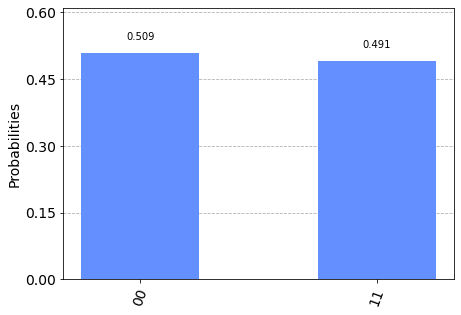

In [13]:
plot_histogram(counts)

The observed probabilities <b>Pr(00)</b> and <b>Pr(11)</b> are computed by taking the respective counts and dividing by the total number of shots.

We can play with values of shots to see variations in probabilities of both states.

<b>Thats how Bell State is acheived using Quantum Computing & Qiskit.